Fernando A Marina Urriola s233144

Gabriele Turetta s233124

Course: 02806 Social Data Analysis and Visualization - DTU - Technical University of Denmark

Spring 2024


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install fuzzywuzzy
!pip install bar_chart_race

## 1. Motivation
1. What is your dataset?
> Data on CO2 and Greenhouse Gas Emissions by Our World in Data. The dataset we are using is a a collection of key metrics maintained by Our World in Data. It includes data on CO2 emissions (annual, per capita, cumulative and consumption-based), other greenhouse gases, energy mix, and other relevant metrics.
In recent years governments and agencies have imposed severe measures on companies that pollute the environment. This in turn has affected citizens, either by increasing the price of products or by forcing the user to use recyclable materials such as wooden cutlery or cardboard straws. Our main motivation with this project is to find out if the situation with pollution has improved over the years (thanks to the measures taken by governments and organisations) or if it remains the same as in the past. Also, we would like to see what the effect of a single user is on the overall pollution computation.

2. Why did you choose this/these particular dataset(s)?
>We have chosen this dataset because it motivates us to understand whether the legal measures taken against the companies are having an effect globally. Furthermore, we are an environmentally conscious group and we wanted to develop a project that has activism, that is to say, that our project would serve for future generations; helping with our visualisations and research to understand more and better what the current situation is.

3. What was your goal for the end user's experience?
>Our ultimate goal in relation to the user in developing this project is to make the user aware that the planet is in a serious situation and we must take action. With the visualisations and exploratory data analysis we will try to make the user understand that they should be more aware of the state of the planet and take action as soon as possible to reduce their carbon footprint or CO2 emissions.

## 2. Basic stats & data engineering

Let's understand the dataset better
1. Write about your choices in data cleaning and preprocessing
> First of all what we did was to load the dataset in a dataframe from the pandas library. Then we started with the basic EDA (dataset information, percentage of nulls etc...).
Next, we realised that there are a lot of variables with a lot of null values (more than 70% in some cases), so we decided to eliminate those variables that had more or equal to 50% of null values, this allowed us to reduce the dataset. At the same time, we also realised that many of the columns we were really interested in contained either a lot of null values or very few, so we decided to reduce the dataset even further by simply deleting the rows that had some null values. We know that this is not the right practice but from here we can do synthetic data augmentation.
We are only interested in data from the year 1900 onwards, so we will delete all rows containing years equal to or less than 1900.

2. Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.
> In order to perform the analysis, two different ways of representing the basic statistics have been used, a boxplot, which allows us to observe the distributions, median and outliers in a simpler way. In some variables we can find what appear to be outliers, but in this section we won't go into eliminating them, we will do so in the next section.
Besides, we have represented the variables in the form of a histogram to see their distribution, most of them seem to be close to zero. This is normal since the variables are measured in million per ton.
In the next section we will carry out an in-depth analysis of each of the variables that we consider important.

In [3]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as py
import plotly.graph_objs as go
import geopandas as gpd
from ipywidgets import interact
import plotly.io as pio




pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/datasocialdata/co2data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22519 entries, 0 to 22518
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    22519 non-null  object 
 1   year                                       22519 non-null  int64  
 2   iso_code                                   18752 non-null  object 
 3   population                                 18240 non-null  float64
 4   gdp                                        7216 non-null   float64
 5   cement_co2                                 11671 non-null  float64
 6   cement_co2_per_capita                      10721 non-null  float64
 7   co2                                        14778 non-null  float64
 8   co2_growth_abs                             13926 non-null  float64
 9   co2_growth_prct                            12453 non-null  float64
 10  co2_including_luc     

As it can be seen, there a lot of variables in the dataset, let's deep into the df

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head(8)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,0.794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,0.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111,NaN,NaN,NaN,NaN,0.110,NaN,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,0.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110,NaN,NaN,NaN,NaN,0.109,NaN,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,0.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110,NaN,NaN,NaN,NaN,0.107,NaN,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109,NaN,NaN,NaN,NaN,0.106,NaN,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,Afghanistan,1855,AFG,3835192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.065,0.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108,NaN,NaN,NaN,NaN,0.106,NaN,NaN,0.162,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,Afghanistan,1856,AFG,3852417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.077,0.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
df.shape

(22519, 79)

There are 48058 (rows) and 79 attributes (columns).

We are of course not going to use all 79 attributes in this project, so deriving a subset containing only the columns we need is appropriate. This subset is stored in its own file, so a much smaller file needs to be loaded into RAM when running this project.

Lets eplore the Null values

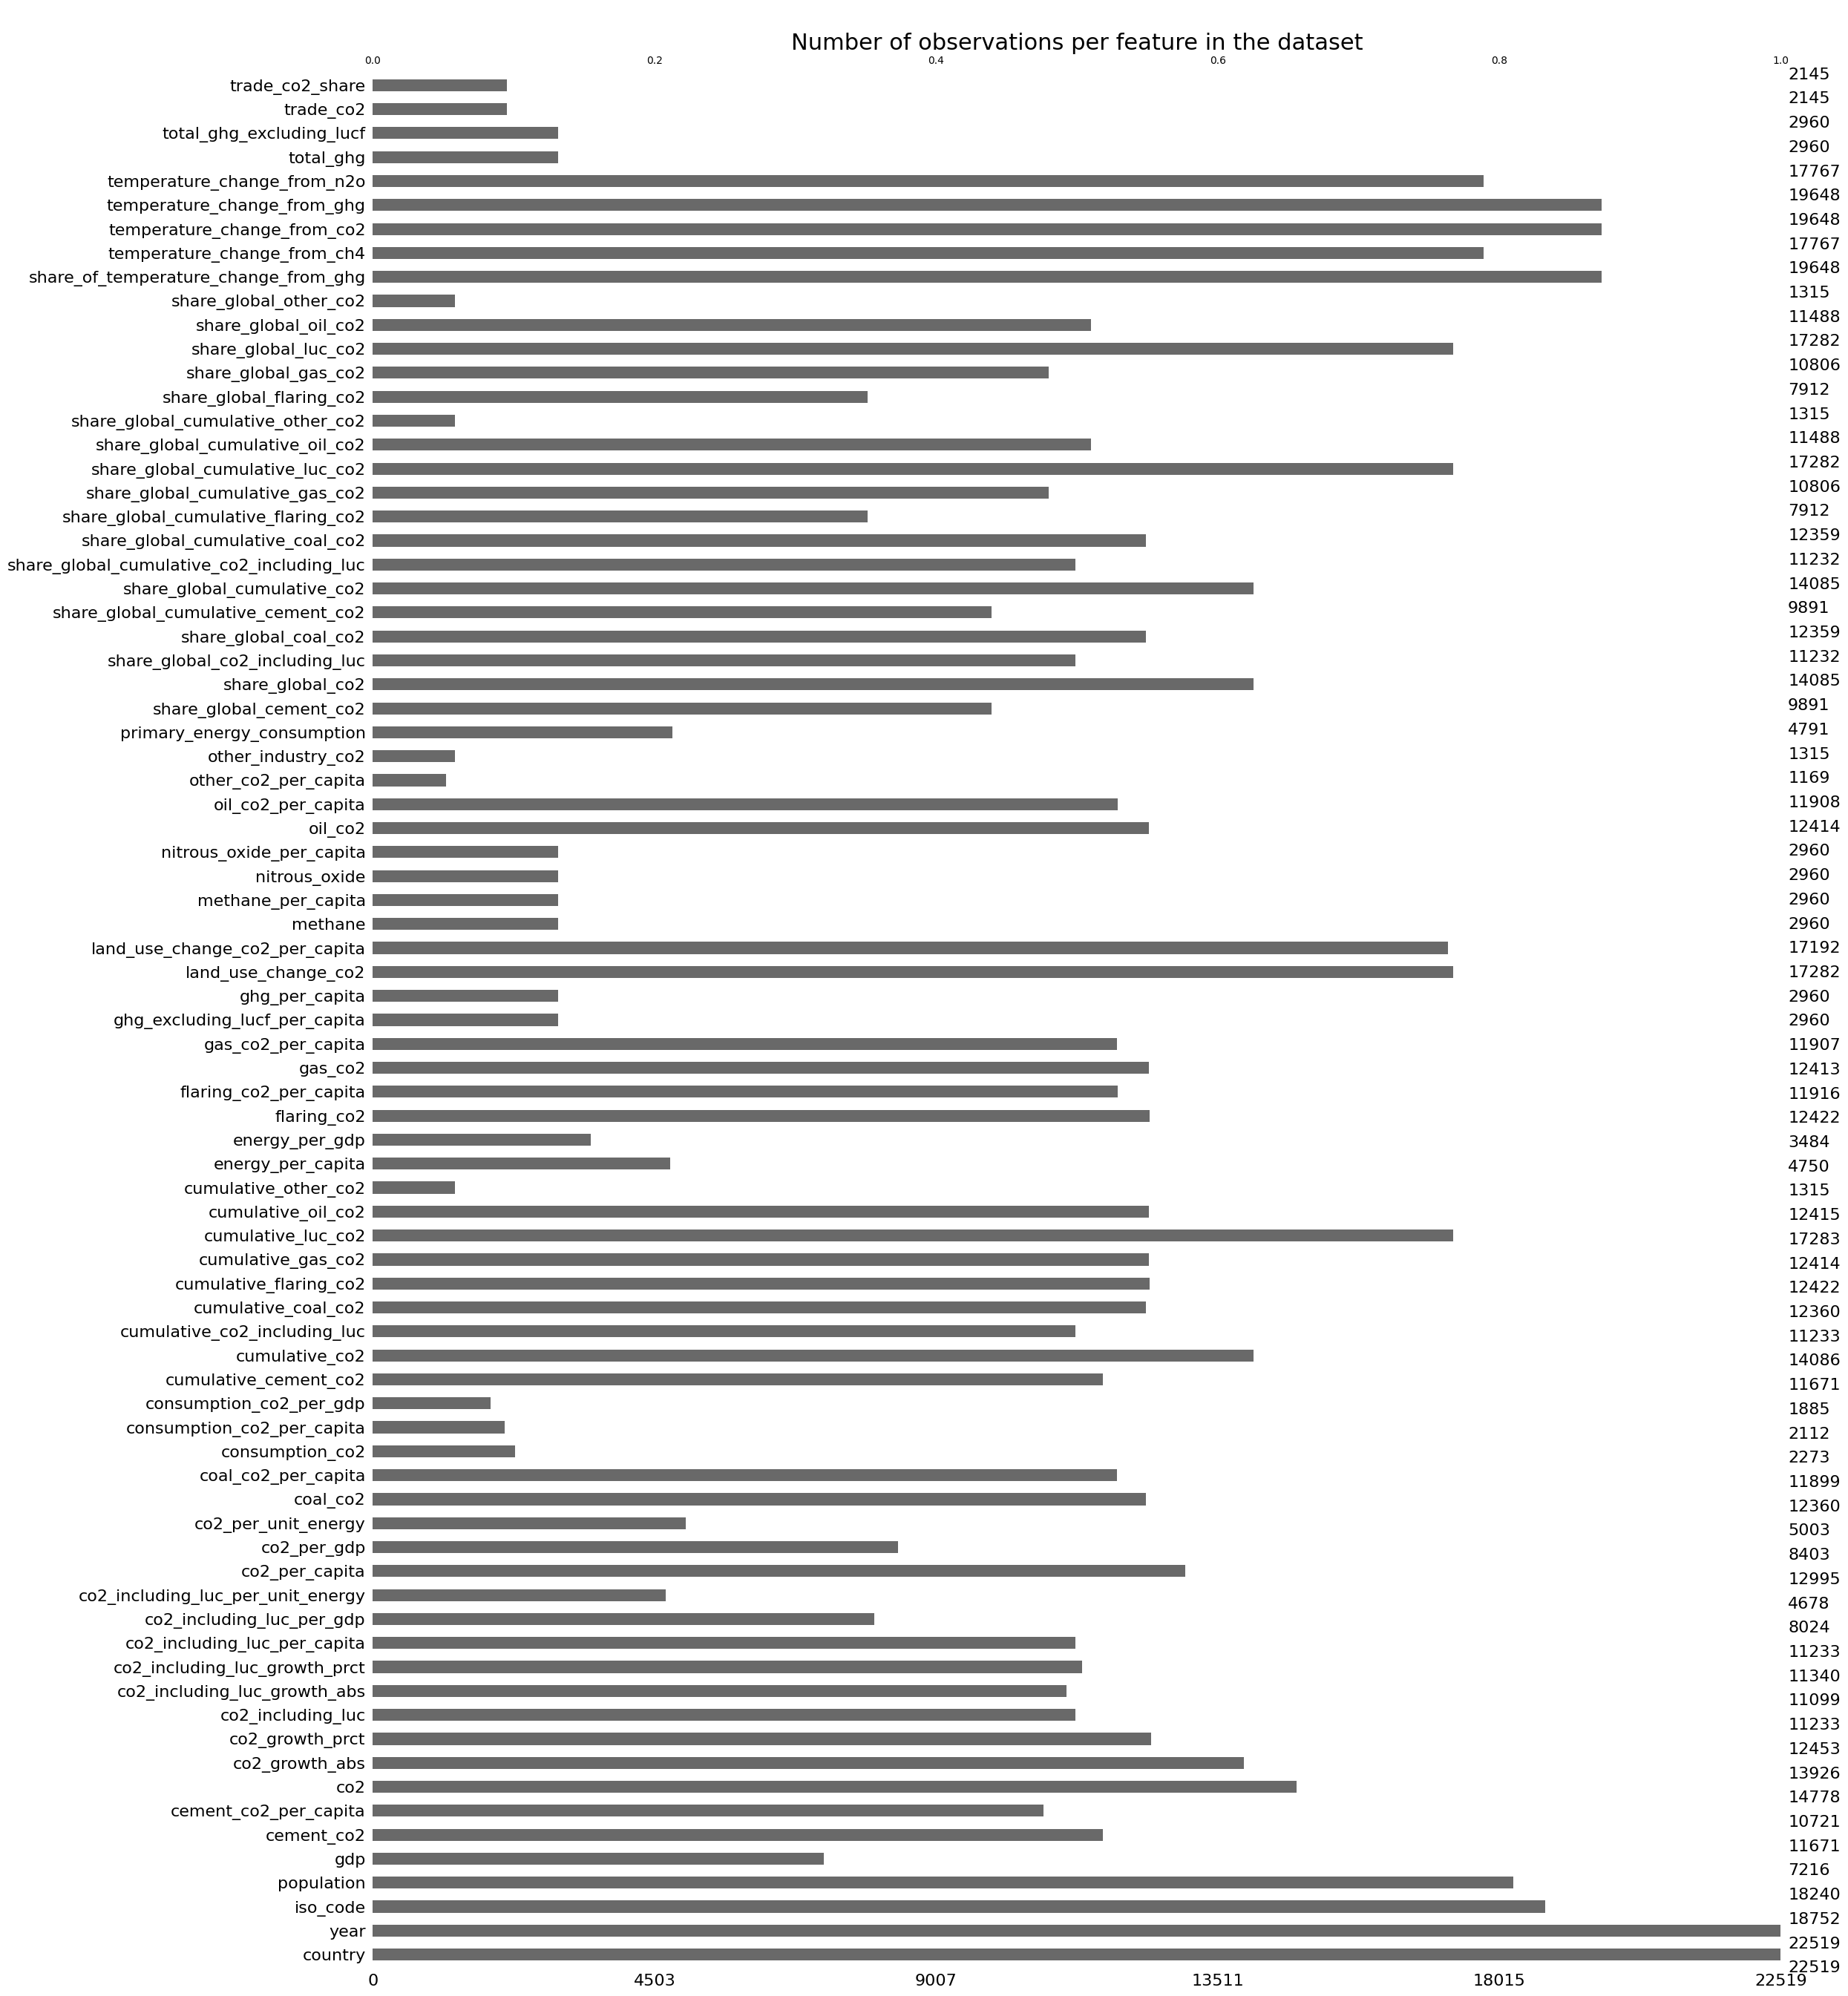

In [9]:
plt.figure(figsize=(20,8))
msno.bar(df)
plt.title('\nNumber of observations per feature in the dataset', fontsize=22)
plt.tight_layout()
plt.show()

As it can be seen there are a lot of variables with a high percentage of NaN values. We are going to set up a threshold in apprx 50%. All variables that have equal or more than 50% of NaN values will be removed. And we will save the other ones in another dataset.

In [10]:
df = df.dropna(axis=1, thresh=0.5 * len(df))

In [11]:
df.shape

(22519, 40)

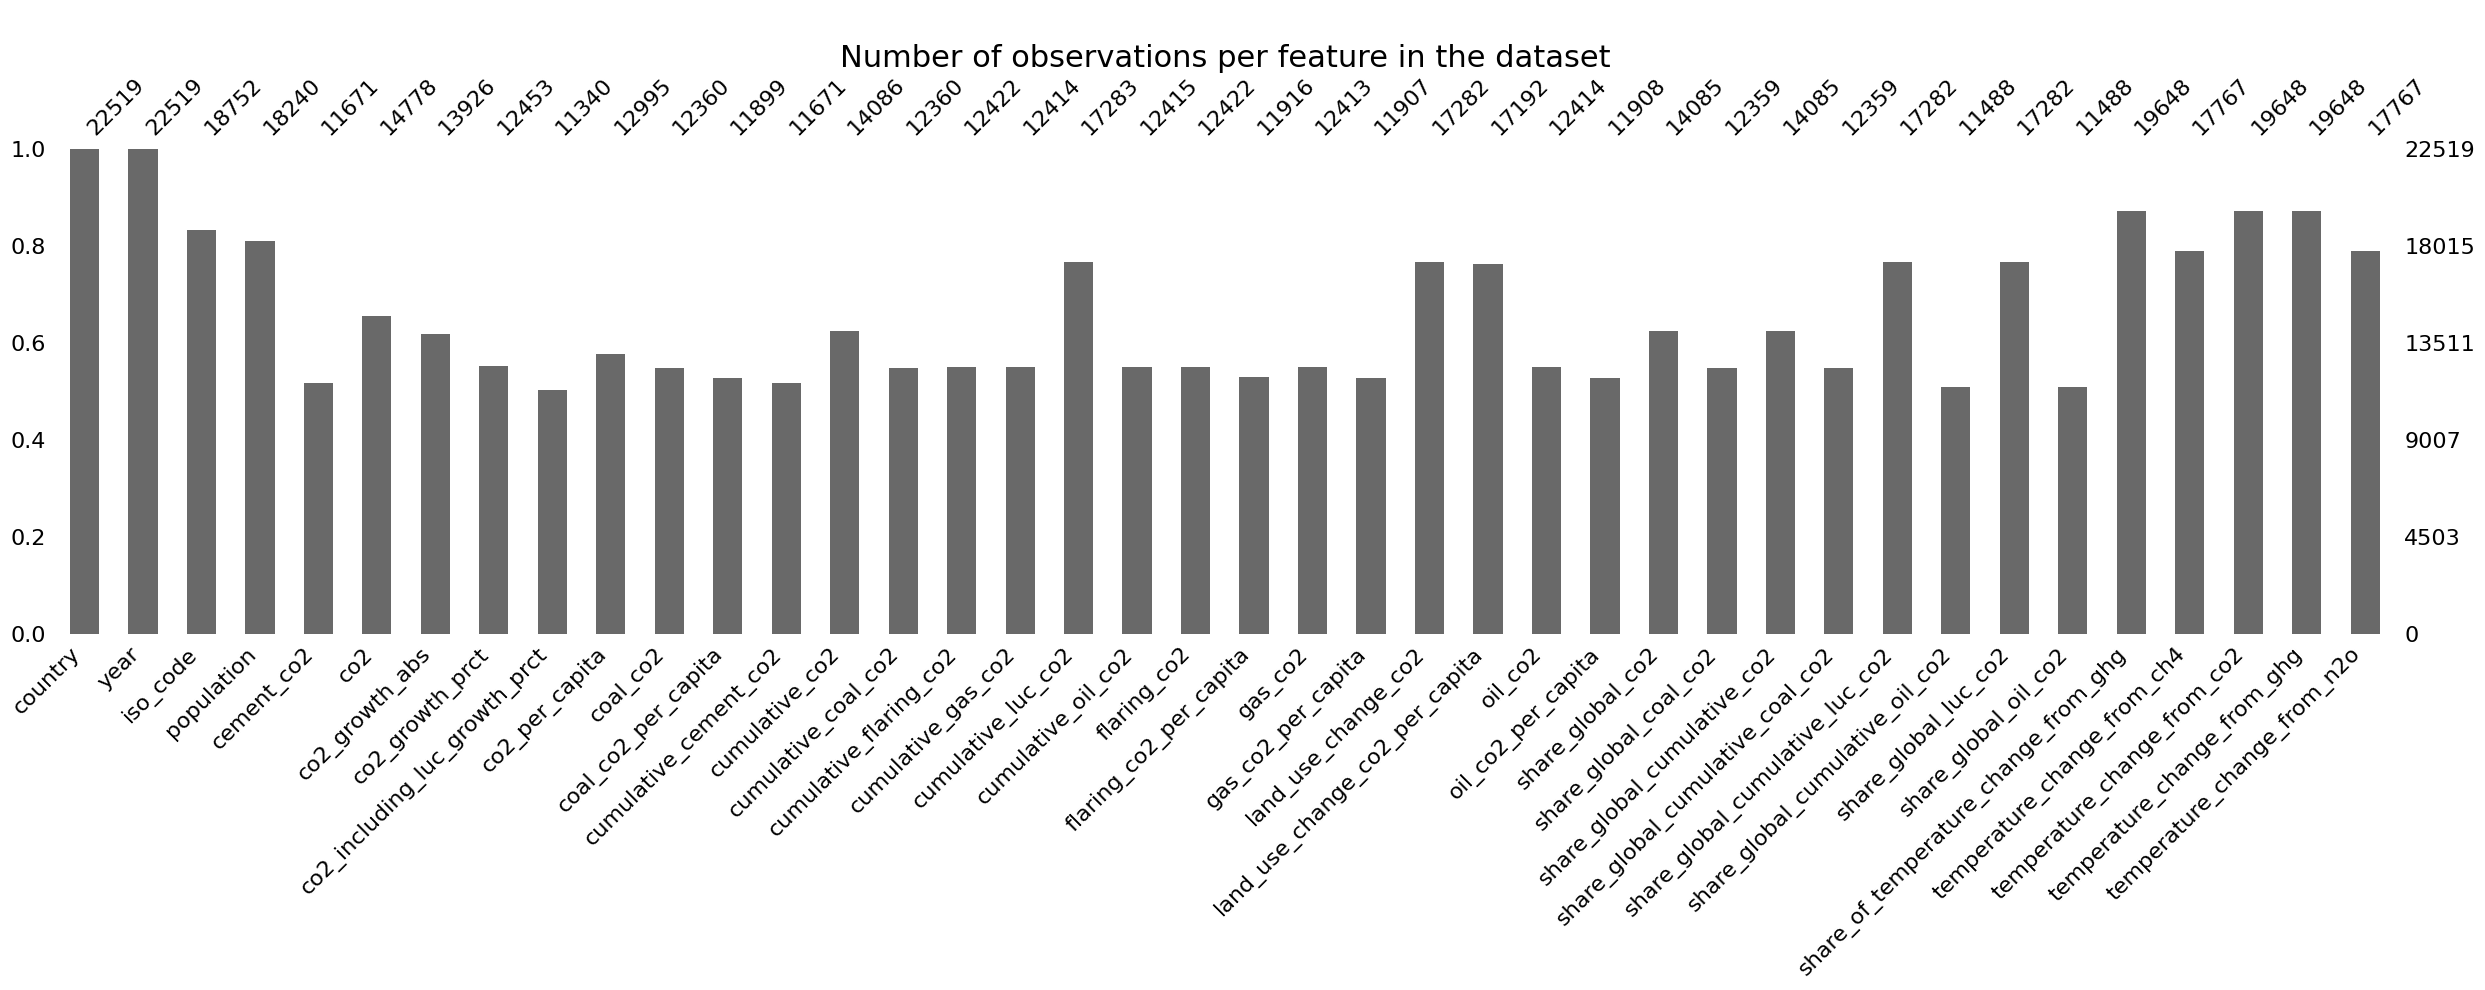

In [12]:
plt.figure(figsize=(20,8))
msno.bar(df)
plt.title('\nNumber of observations per feature in the dataset', fontsize=22)
plt.tight_layout()
plt.show()

Now our data looks more 'clean' and we have reduced the amount of columns from 79 to 36, which makes our life easier.
We will save this resultng dataset in another csv file to work with it.

Now let's continue with the preprocessing

In [13]:
df.shape

(22519, 40)

In [14]:
df.isnull().sum()*100/df.isnull().count()

country                                  0.000000
year                                     0.000000
iso_code                                16.728096
population                              19.001732
cement_co2                              48.172654
co2                                     34.375416
co2_growth_abs                          38.158888
co2_growth_prct                         44.700031
co2_including_luc_growth_prct           49.642524
co2_per_capita                          42.293175
coal_co2                                45.113016
coal_co2_per_capita                     47.160176
cumulative_cement_co2                   48.172654
cumulative_co2                          37.448377
cumulative_coal_co2                     45.113016
cumulative_flaring_co2                  44.837693
cumulative_gas_co2                      44.873218
cumulative_luc_co2                      23.251477
cumulative_oil_co2                      44.868777
flaring_co2                             44.837693


Indeed, we still have a lot of missing values and the percentage for the majority of them is really high. We will try to reduce the amount of rows and getting a high quality dataset by dropping the rows with NaN values.
We know this is not a good practice but actually the columns that we are intersted in either have a big amount of NaN values or they don't have a lot of them, so in the end we will keep this practice.

In [15]:
df.dropna(inplace=True)
df.shape

(7164, 40)

Now, we have reduced our dataset from 48k rows to 18,7k which is, indeed, really good as well.

Now our dataset is cleaned and ready to be used. First, let's check the stats of the dataset.

We are going to use only rows from 1900 to 2023


In [16]:
# drop rows <= 1900
df = df[df['year'] > 1900]

In [17]:
df.shape

(7112, 40)

In [20]:
df.to_csv('co2data_clean.csv')
df = pd.read_csv('co2data_clean.csv')
df.shape

(7112, 41)

So we have reduced the data from 18k to 16k. This data now is completely clean and ready to use.

In [21]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'cement_co2', 'co2',
       'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc_growth_prct',
       'co2_per_capita', 'coal_co2', 'coal_co2_per_capita',
       'cumulative_cement_co2', 'cumulative_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2',
       'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_co2', 'share_global_cumulative_coal_co2',
       'share_global_cumulative_luc_co2', 'share_global_cumulative_oil_co2',
       'share_global_luc_co2', 'share_global_oil_co2',
       'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4',
       'temperature_change_from_co2', 'temperature_change_from_ghg',
       'temperature_change_f

Let's do some basic plots to see the basic stats and distributions

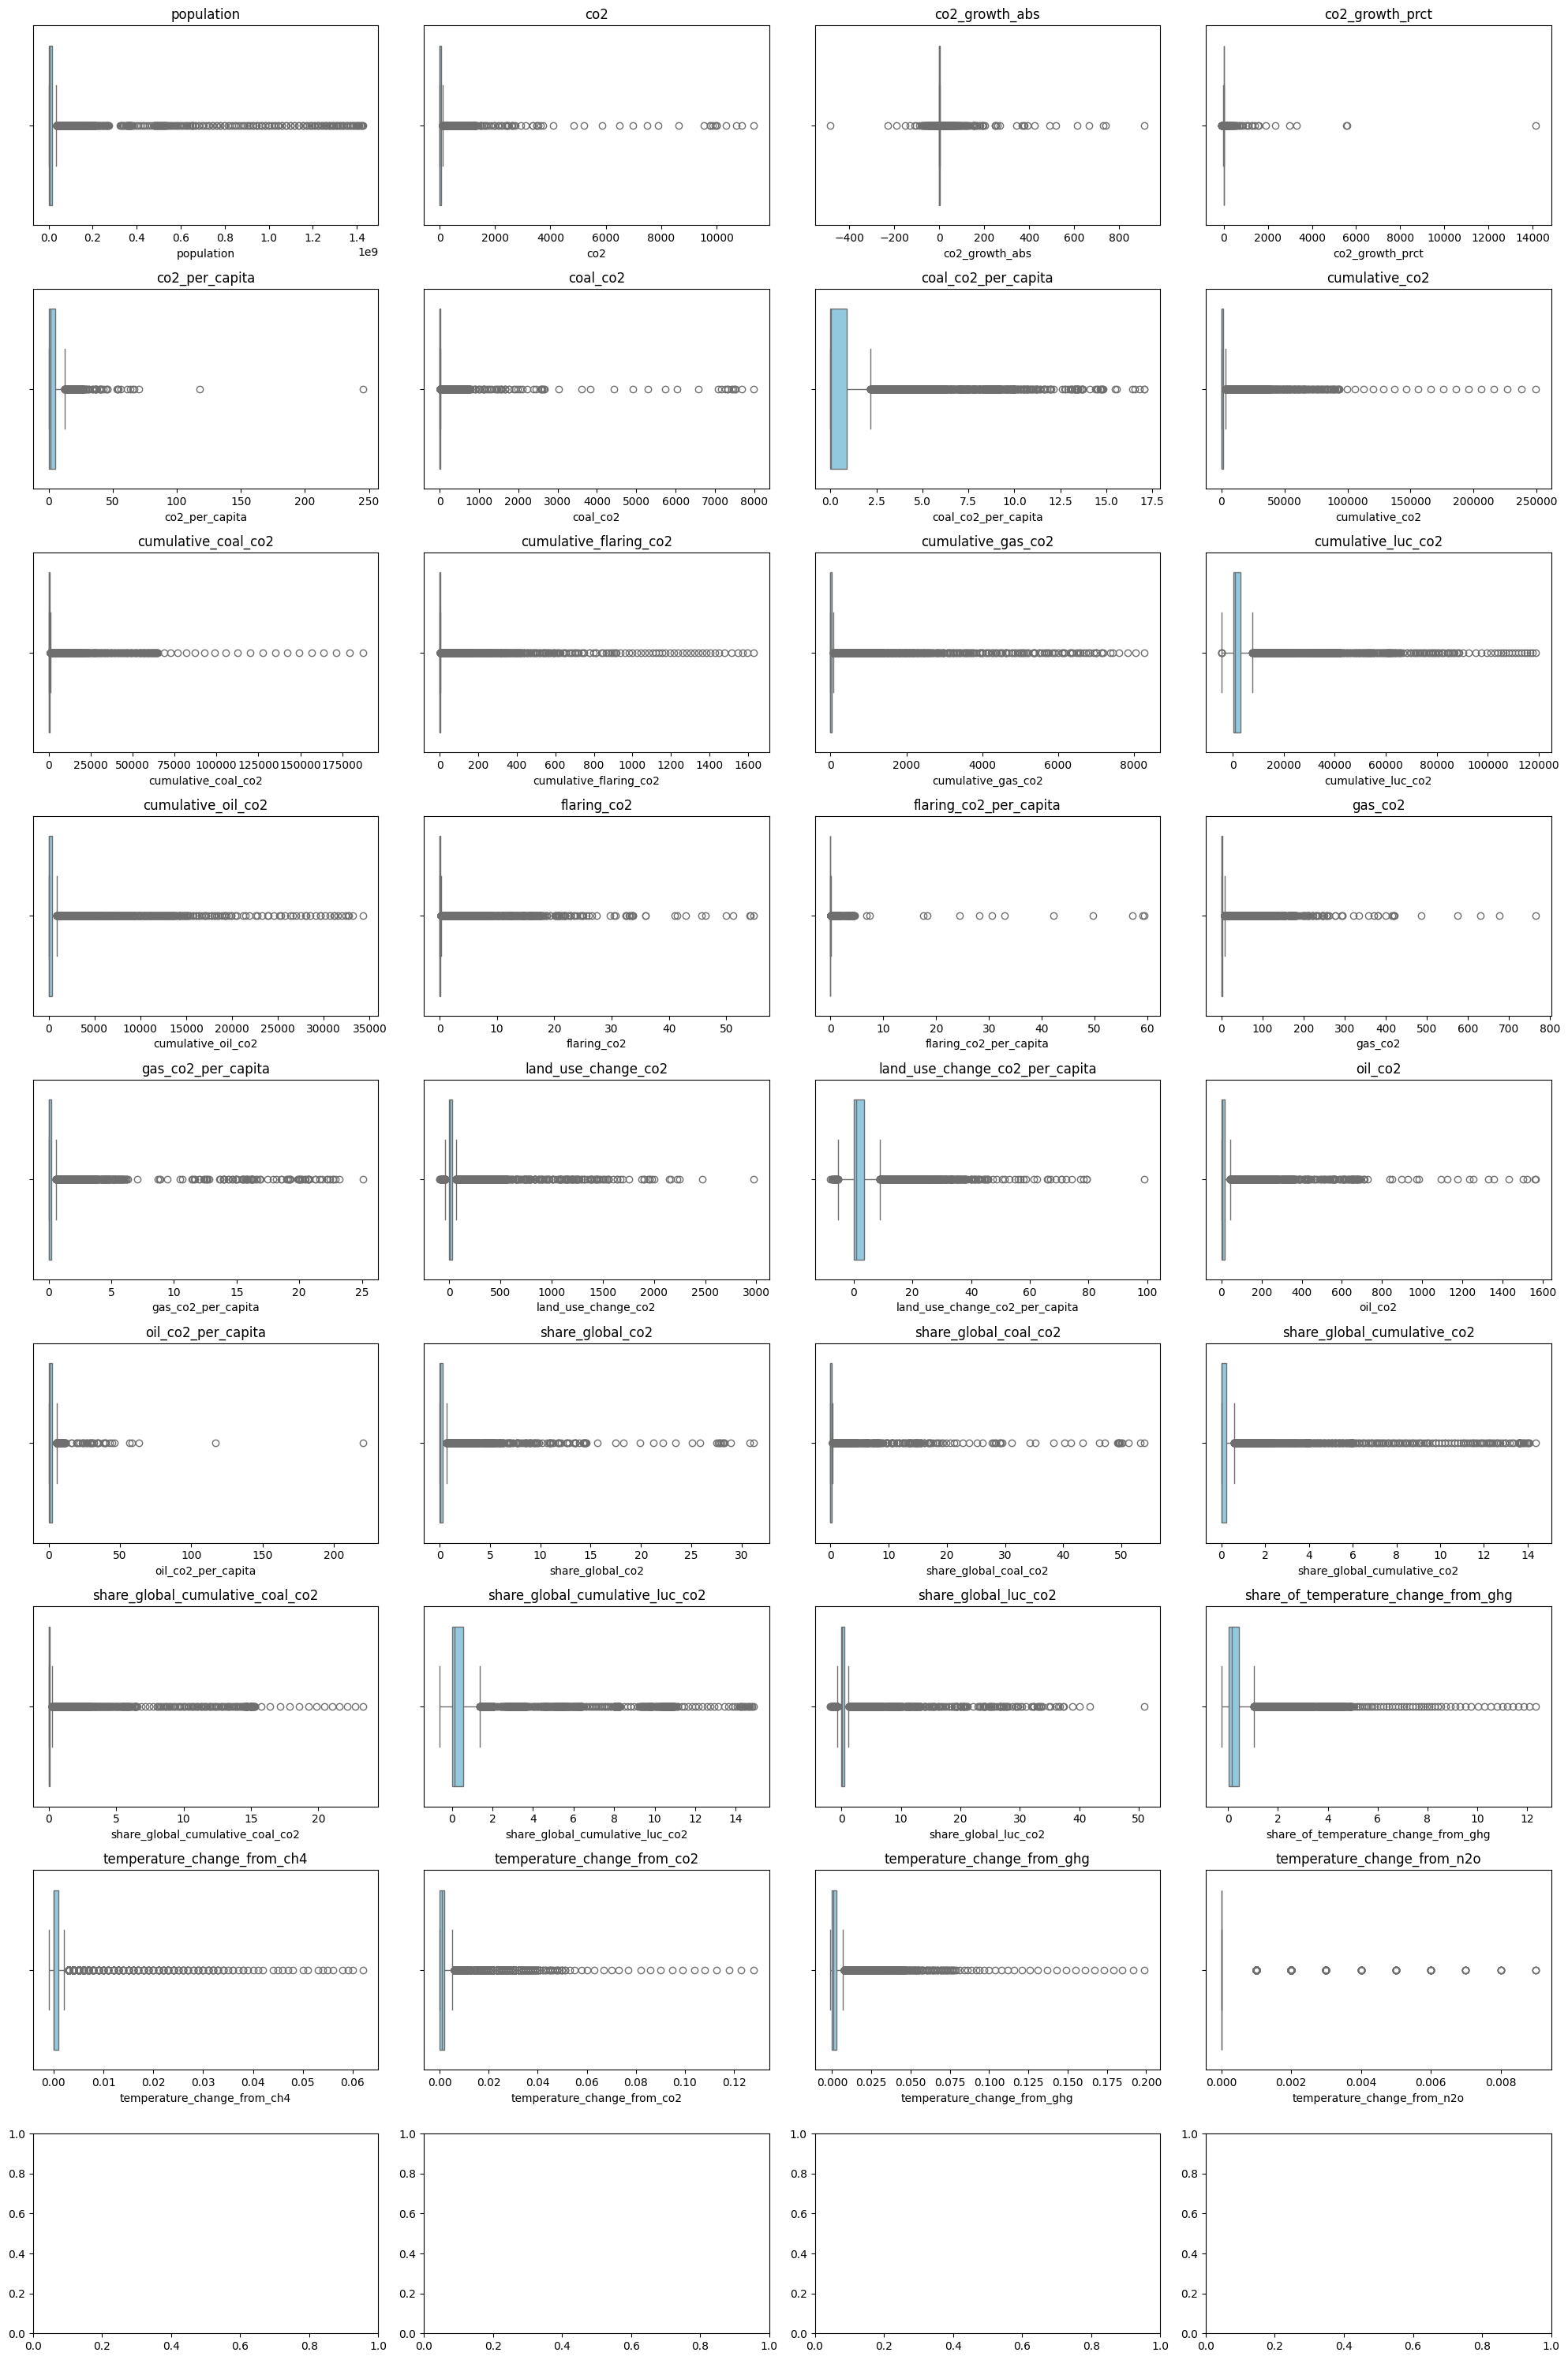

In [23]:
def boxplot_df(df):
    continuous_variables = [
        'population', 'co2', 'co2_growth_abs',
        'co2_growth_prct', 'co2_per_capita', 'coal_co2',
        'coal_co2_per_capita', 'cumulative_co2', 'cumulative_coal_co2',
        'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
        'cumulative_oil_co2', 'flaring_co2', 'flaring_co2_per_capita',
        'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2',
        'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
        'share_global_co2', 'share_global_coal_co2',
        'share_global_cumulative_co2', 'share_global_cumulative_coal_co2',
        'share_global_cumulative_luc_co2', 'share_global_luc_co2',
        'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4',
        'temperature_change_from_co2', 'temperature_change_from_ghg',
        'temperature_change_from_n2o'
    ]

    fig, ax = plt.subplots(9, 4, figsize=(20, 30))
    ax = ax.flatten()

    for i, column in enumerate(continuous_variables):
        sns.boxplot(data=df, x=column, ax=ax[i], color='skyblue')
        ax[i].set_title(column)

    plt.tight_layout()
    plt.show()

boxplot_df(df)

The info above is good but not enough to see in reality the distribution of our data. So let's make a function to plot all the data we have but with Histograms.

<ipython-input-24-9dd4c2f05508>:22: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-9dd4c2f05508>:22: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-24-9dd4c2f05508>:22: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

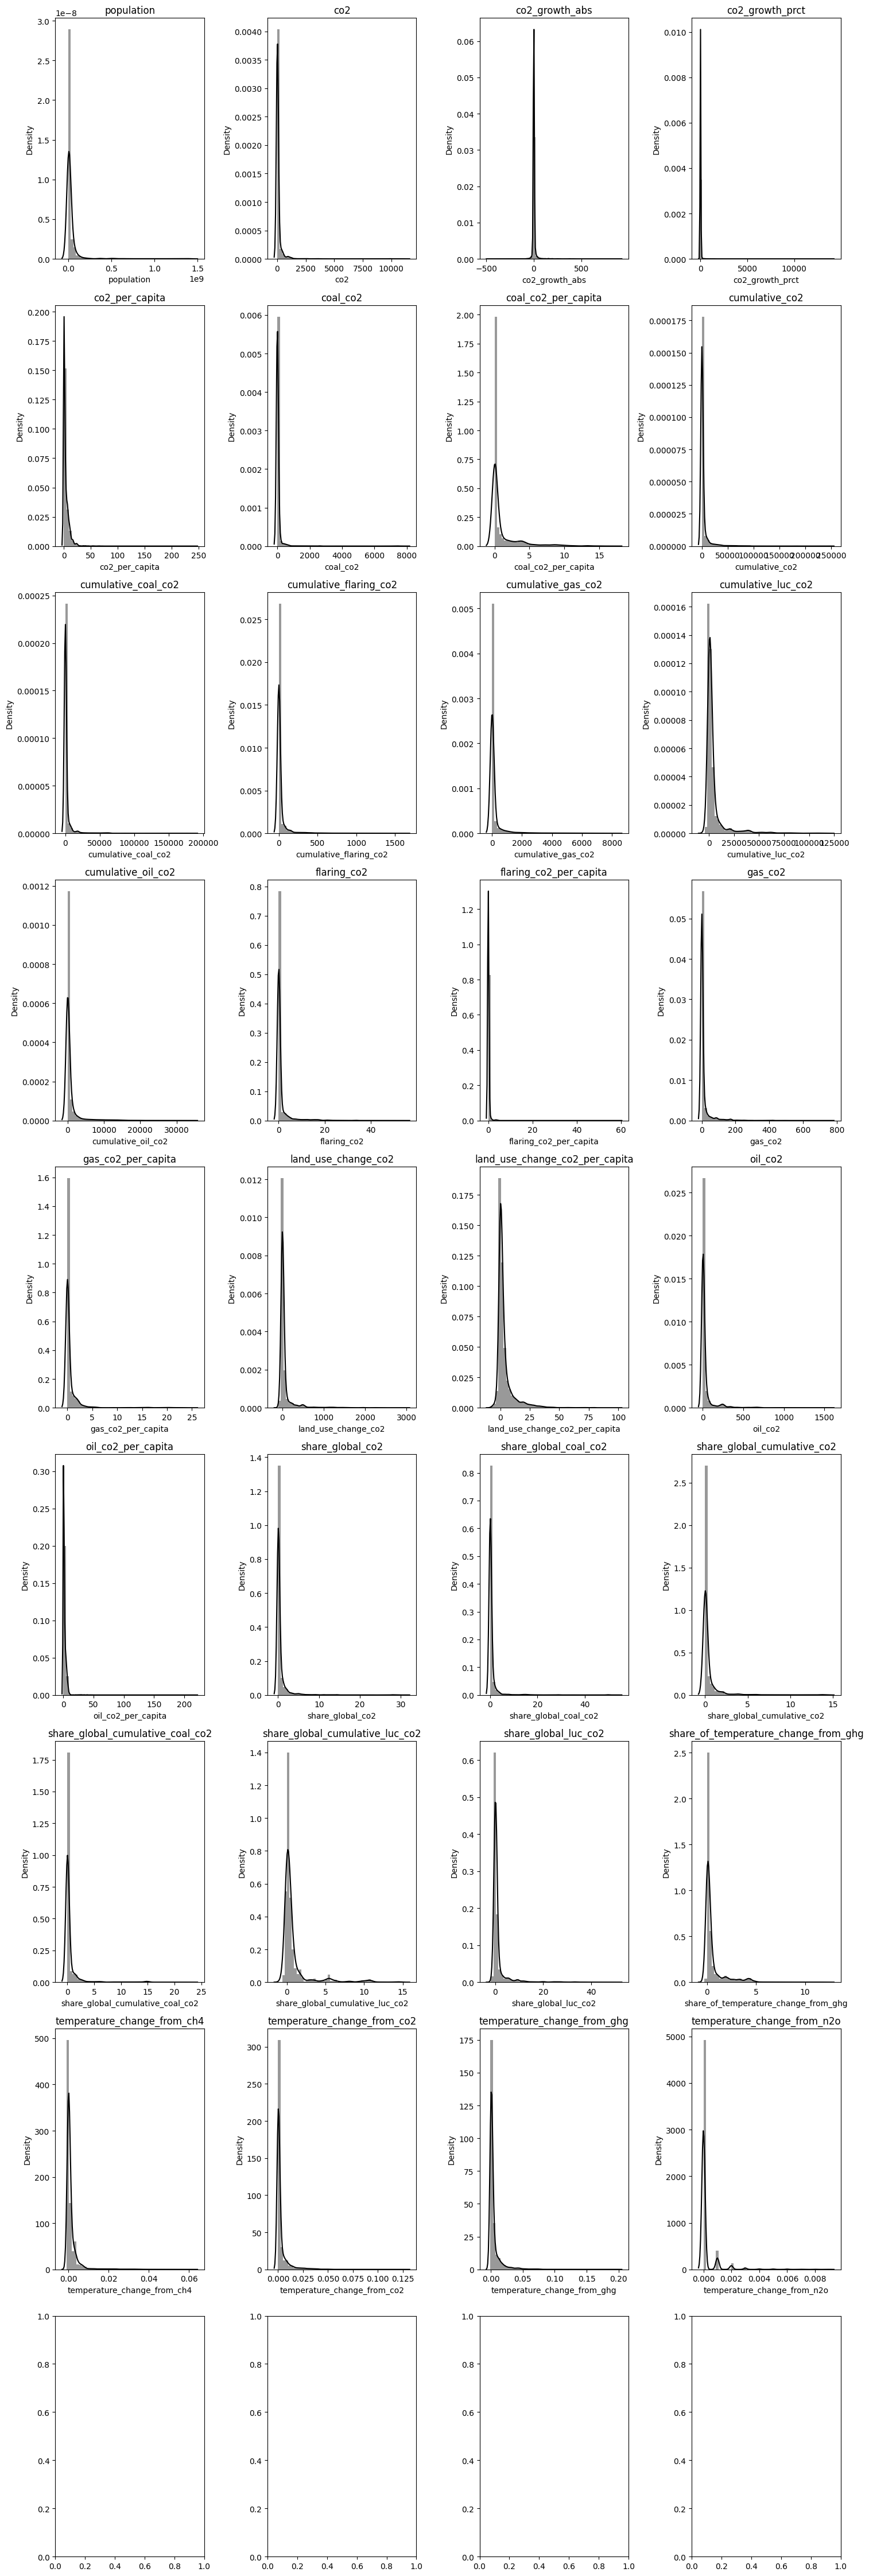

In [24]:
def histogram_with_line(df):
    continuous_variables = [
        'population', 'co2', 'co2_growth_abs',
        'co2_growth_prct', 'co2_per_capita', 'coal_co2',
        'coal_co2_per_capita', 'cumulative_co2', 'cumulative_coal_co2',
        'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
        'cumulative_oil_co2', 'flaring_co2', 'flaring_co2_per_capita',
        'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2',
        'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
        'share_global_co2', 'share_global_coal_co2',
        'share_global_cumulative_co2', 'share_global_cumulative_coal_co2',
        'share_global_cumulative_luc_co2', 'share_global_luc_co2',
        'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4',
        'temperature_change_from_co2', 'temperature_change_from_ghg',
        'temperature_change_from_n2o'
    ]

    fig, ax = plt.subplots(9, 4, figsize=(15, 45))
    ax = ax.flatten()

    for i, column in enumerate(continuous_variables):
        sns.distplot(df[column], kde=True, ax=ax[i], color='black')
        ax[i].set_title(column)

    plt.tight_layout()
    plt.show()

histogram_with_line(df)

In [25]:
df.describe()

,year,population,cement_co2,co2,co2_growth_abs,co2_growth_prct,co2_including_luc_growth_prct,co2_per_capita,coal_co2,coal_co2_per_capita,cumulative_cement_co2,cumulative_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,oil_co2,oil_co2_per_capita,share_global_co2,share_global_coal_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
count,7112.000000,7.112000e+03,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000
mean,1979.416198,3.757607e+07,4.147007,101.647982,2.863765,14.055222,9.502471,3.684402,52.149328,1.091329,81.485650,3231.886348,2005.148465,27.388173,198.996207,4649.839226,900.595987,1.054256,0.136417,10.665754,0.580097,58.264261,3.549814,32.702817,1.782962,0.530306,0.639315,0.466961,0.518006,0.836217,0.349757,1.084190,0.432022,0.578214,0.001380,0.002862,0.004566,0.000193
std,25.917614,1.438978e+08,36.228992,520.945915,29.162636,209.582448,254.956026,6.243728,372.594162,2.312013,537.308234,12395.797777,9098.517173,116.116285,736.157654,11940.147081,2920.883982,3.799621,1.653671,37.493382,2.067711,196.640714,7.602055,101.836847,4.215172,1.873626,3.170606,1.495559,1.949078,2.015131,0.797294,3.684374,1.077032,1.183765,0.004282,0.007539,0.012012,0.000696
min,1901.000000,1.504900e+04,0.000000,0.000000,-484.209000,-100.000000,-2272.402000,0.000000,0.000000,0.000000,0.000000,0.007000,0.000000,0.000000,0.000000,-4394.152000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.938000,-7.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.604000,0.000000,-1.837000,0.000000,-0.264000,-0.001000,0.000000,-0.001000,0.000000
25%,1960.000000,1.526853e+06,0.000000,0.839000,-0.029000,-1.477250,-7.033250,0.324500,0.000000,0.000000,0.013750,11.896250,0.018750,0.000000,0.000000,189.094250,6.606250,0.000000,0.000000,0.000000,0.000000,0.035000,0.036000,0.462000,0.176000,0.006000,0.000000,0.002000,0.000000,0.031000,0.005000,0.001000,0.008000,0.029000,0.000000,0.000000,0.000000,0.000000
50%,1981.000000,6.047209e+06,0.175500,6.283000,0.070000,3.774000,0.795500,1.446500,0.170500,0.024000,2.671000,134.270500,4.164000,0.000000,0.044000,834.664000,58.047500,0.000000,0.000000,0.002000,0.000000,4.365000,0.942500,2.719500,0.710500,0.038000,0.002000,0.020000,0.001000,0.145000,0.038000,0.083000,0.049000,0.140000,0.000000,0.001000,0.001000,0.000000
75%,2001.000000,1.508628e+07,1.111250,45.686750,1.092250,10.407250,7.677500,5.216500,9.887750,0.866500,25.237000,1353.167000,417.602750,2.156000,32.858500,3203.979750,371.446250,0.095000,0.005000,2.903500,0.243250,26.235500,3.595250,17.561250,2.365750,0.275000,0.146000,0.233000,0.103250,0.566250,0.284000,0.489250,0.298250,0.429000,0.001000,0.002000,0.003000,0.000000
max,2021.000000,1.425894e+09,858.233000,11336.233000,911.782000,14127.272000,18758.281000,245.081000,7979.436000,17.077000,15639.820000,249222.469000,187150.719000,1627.948000,8280.715000,118651.688000,34237.902000,54.758000,59.457000,764.102000,25.056000,2973.366000,99.066000,1564.370000,220.025000,31.176000,53.983000,14.358000,23.279000,14.874000,6.022000,50.970000,13.973000,12.336000,0.062000,0.128000,0.199000,0.009000


As we can see, the vast majority of the variables are closee to 0 but this is normal as the variables are normalized. The majority of them are measured in million tonnes. This can, as well, be seen in the 50th quartile, which is the median.

For example:
> co2 : Annual CO₂ emissions - Annual total emissions of carbon dioxide (CO₂), excluding land-use change, measured in million tonnes.

**More information about the variables descriptions can be found [here](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv)**

In the next section we will explore in depth de data

## 3. Data analysis
1. Describe your data analysis and explain what you've learned about the dataset.
> At the beginning, our data analysis focused on getting a global and general view of the data. For this, we made box plots of all the variables, with this we were able to see the distribution, outliers, etc. Next, we set out to see how many countries were in the dataset, what was the maximum population of each of them, etc... Once we reviewed the countries, we focused on developing interactive plots to observe the distribution of the countries over the years, that is, which are the countries that have polluted the most over the years? etc.

>In this case, from the dataset we have mainly learned that countries with large populations like the US, China or India, are the main contributors in terms of CO2 emissions.

>As for global warming, the US is at the forefront of this position because, historically, it has been the country that has contributed the most to the rise in global temperature.

>One of the things that surprised us the most is that Qatar is presented as the country that produces the most CO2 emissions per capita in the year 2021, something that left us impressed since we thought it was going to be China, India or the US.
2. If relevant, talk about your machine-learning.
> For this project, the focus has been shifted towards data analysis and phenomena understanding, rather than predictions of trends, therefore we will not include machine learning models within this project.

In [26]:
df = pd.read_csv('/content/drive/MyDrive/datasocialdata/co2data_clean.csv')
df.shape

(16823, 36)

In [27]:
df.columns

Index(['Unnamed: 0', 'country', 'year', 'iso_code', 'population', 'co2',
       'co2_growth_abs', 'co2_growth_prct', 'co2_per_capita', 'coal_co2',
       'coal_co2_per_capita', 'cumulative_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2',
       'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_co2', 'share_global_cumulative_coal_co2',
       'share_global_cumulative_luc_co2', 'share_global_luc_co2',
       'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4',
       'temperature_change_from_co2', 'temperature_change_from_ghg',
       'temperature_change_from_n2o'],
      dtype='object')

In [28]:
df.drop(['iso_code', 'Unnamed: 0'], inplace=True, axis=1)

In [29]:
df.head()

,country,year,population,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,coal_co2,coal_co2_per_capita,cumulative_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,oil_co2,oil_co2_per_capita,share_global_co2,share_global_coal_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1950,7480464.0,0.084,0.070,475.000,0.011,0.021,0.003,0.099,0.036,0.0,0.0,524.616,0.063,0.0,0.0,0.0,0.0,7.286,0.974,0.063,0.008,0.001,0.001,0.0,0.0,0.127,0.120,0.129,0.0,0.0,0.000,0.0
1,Afghanistan,1951,7571542.0,0.092,0.007,8.696,0.012,0.026,0.003,0.191,0.061,0.0,0.0,532.756,0.129,0.0,0.0,0.0,0.0,8.140,1.075,0.066,0.009,0.001,0.001,0.0,0.0,0.127,0.132,0.129,0.0,0.0,0.001,0.0
2,Afghanistan,1952,7667534.0,0.092,0.000,0.000,0.012,0.032,0.004,0.282,0.093,0.0,0.0,541.847,0.189,0.0,0.0,0.0,0.0,9.091,1.186,0.060,0.008,0.001,0.001,0.0,0.0,0.127,0.144,0.129,0.0,0.0,0.001,0.0
3,Afghanistan,1953,7764549.0,0.106,0.015,16.000,0.014,0.038,0.005,0.388,0.131,0.0,0.0,551.997,0.257,0.0,0.0,0.0,0.0,10.150,1.307,0.068,0.009,0.002,0.001,0.0,0.0,0.128,0.158,0.129,0.0,0.0,0.001,0.0
4,Afghanistan,1954,7864289.0,0.106,0.000,0.000,0.014,0.043,0.005,0.495,0.174,0.0,0.0,562.987,0.321,0.0,0.0,0.0,0.0,10.990,1.397,0.064,0.008,0.002,0.001,0.0,0.0,0.128,0.167,0.129,0.0,0.0,0.001,0.0


>How many countries are in the dataset?

In [30]:
print("Number of unique countries in the dataset:", len(df.country.unique()))

Number of unique countries in the dataset: 193


> Max number of population registered for each country. The more population, the more pollution

In [31]:
unique_countries = df['country'].unique()

for country in unique_countries:
    # Filter the DataFrame for the current country
    country_data = df[df['country'] == country]
    # Find the maximum population for the current country
    max_population = country_data['population'].max()
    # Print the country and its maximum population
    print(f"Country: {country}, Maximum Population: {max_population}")

Country: Afghanistan, Maximum Population: 40099460.0
Country: Albania, Maximum Population: 3303738.0
Country: Algeria, Maximum Population: 44177964.0
Country: Andorra, Maximum Population: 80241.0
Country: Angola, Maximum Population: 34503776.0
Country: Antigua and Barbuda, Maximum Population: 93229.0
Country: Argentina, Maximum Population: 45276788.0
Country: Armenia, Maximum Population: 3617638.0
Country: Australia, Maximum Population: 25921094.0
Country: Austria, Maximum Population: 8922086.0
Country: Azerbaijan, Maximum Population: 10312992.0
Country: Bahamas, Maximum Population: 407920.0
Country: Bahrain, Maximum Population: 1494195.0
Country: Bangladesh, Maximum Population: 169356240.0
Country: Barbados, Maximum Population: 281204.0
Country: Belarus, Maximum Population: 10480485.0
Country: Belgium, Maximum Population: 11611416.0
Country: Belize, Maximum Population: 400037.0
Country: Benin, Maximum Population: 12996901.0
Country: Bhutan, Maximum Population: 777500.0
Country: Bolivi

>As it can be seen, China and India are the top countries when it comes to population. This is insightful for us because we can actually see if they co2 data is more than a less populated and greener country like denmark, for example.

Now, we would like to focus in the year **2021** as it is the last year available for this study. Let's do some visualizations:

### Visualizations (both interactive and non-interactive)

#### Top 20 CO2 emissions per country in year 1901

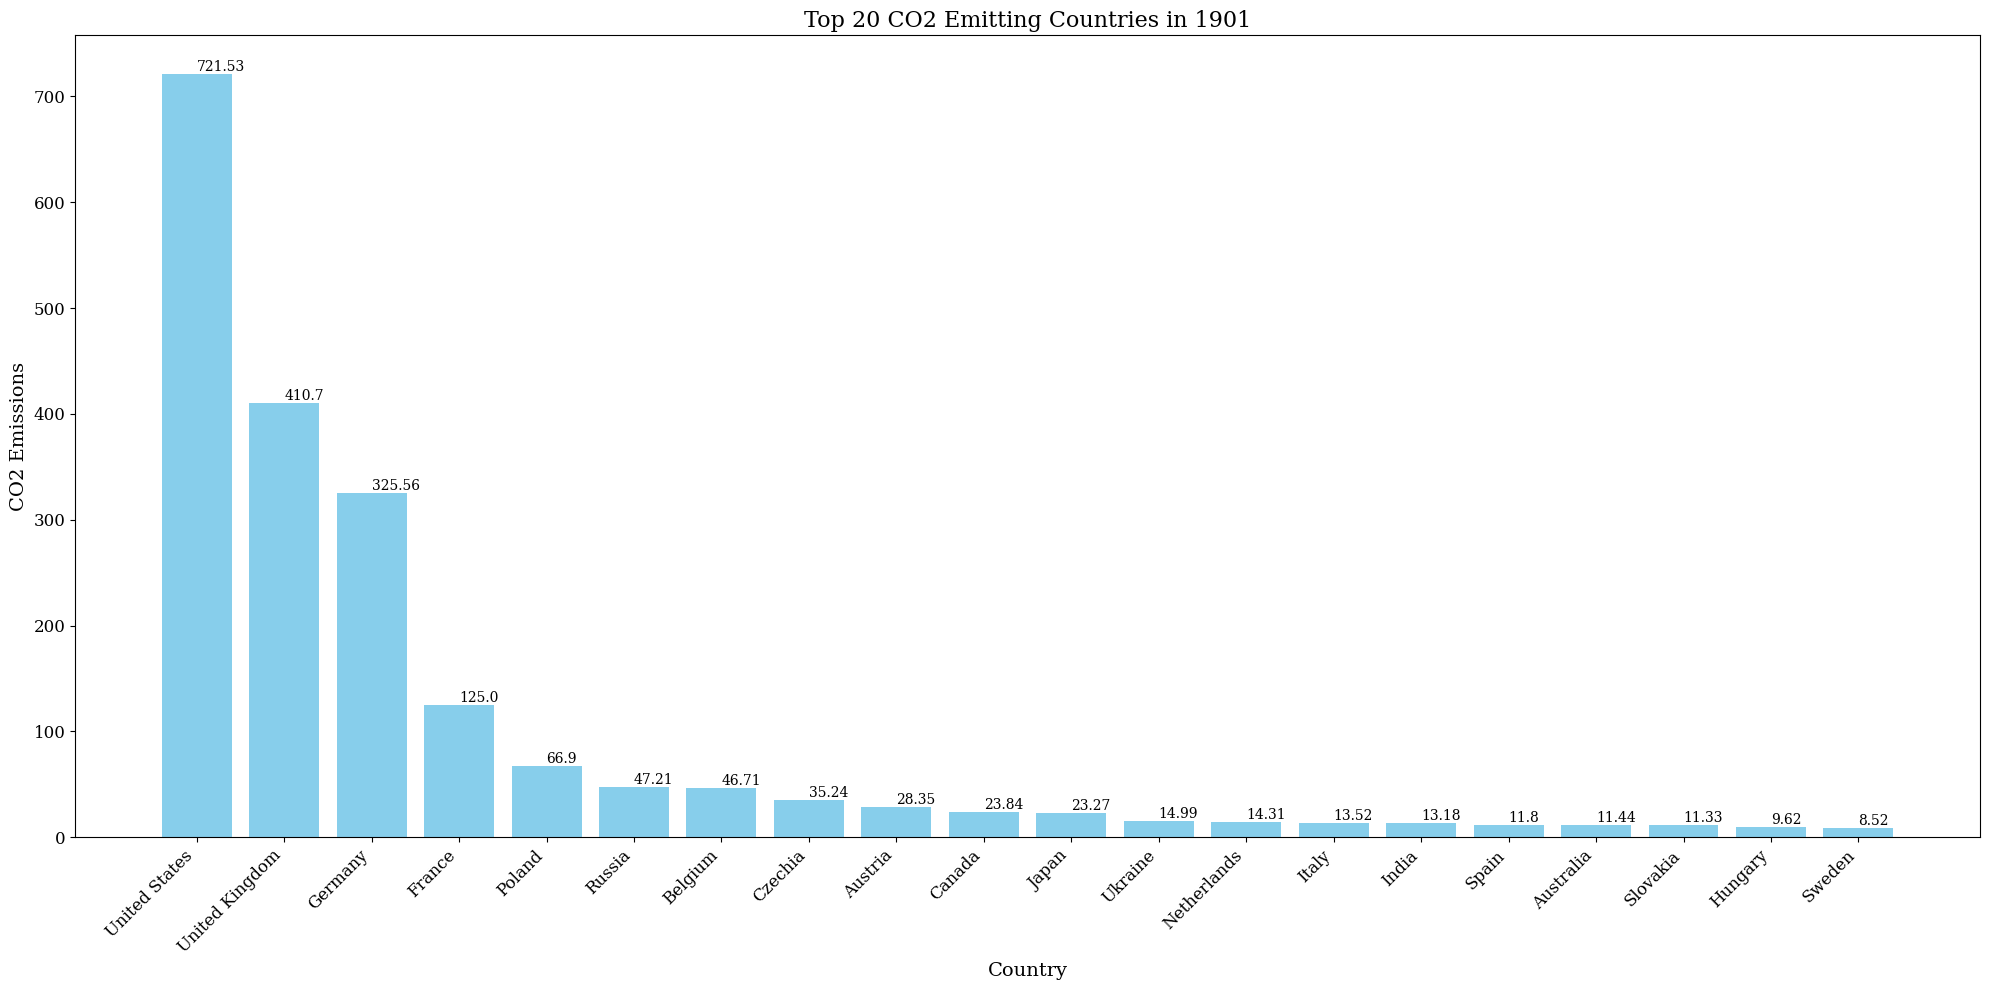

In [32]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

for year in range(1901, 1902):
    df_1901 = df[df['year'] == year]
    df_top_20 = df_1901.sort_values(by='co2', ascending=False).head(20)


    plt.rcParams['font.family'] = 'serif'

    # Plotting
    plt.figure(figsize=(20, 10))  # Regola la dimensione della figura
    bars = plt.bar(df_top_20['country'], df_top_20['co2'], color='skyblue')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

    plt.xlabel('Country', fontsize=14)
    plt.ylabel('CO2 Emissions', fontsize=14)
    plt.title(f'Top 20 CO2 Emitting Countries in {year}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

#### CO2 emissions during WW1

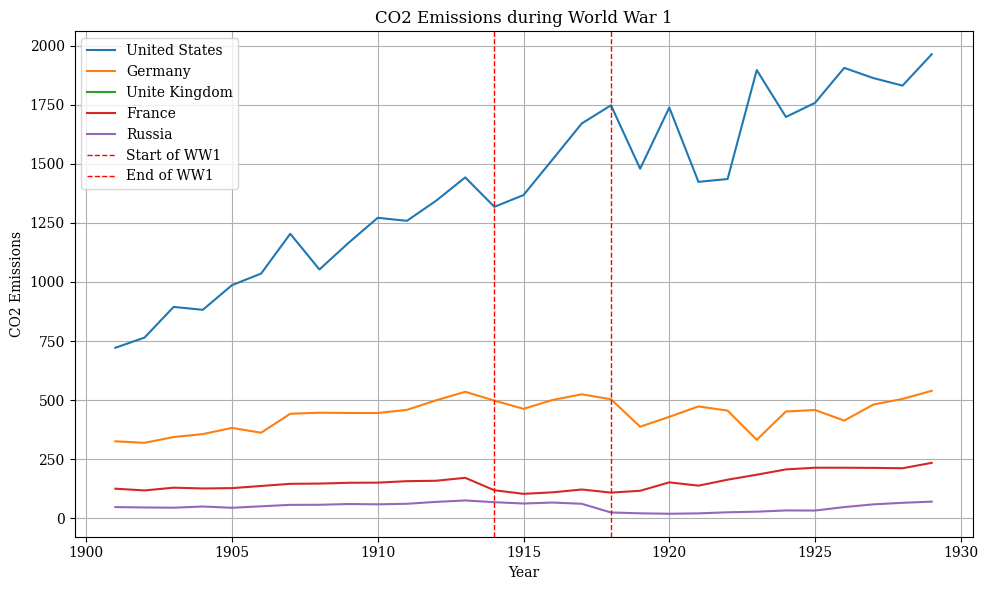

In [33]:
#world war 1 plot
countries_to_plot = ['United States', 'Germany', 'Unite Kingdom', 'France', 'Russia', ]

countries_data = df[df['country'].isin(countries_to_plot)]
countries_data_1919 = countries_data[(countries_data['year'] < 1930) & (countries_data['year'] > 1900)]
plt.figure(figsize=(10, 6))

for country in countries_to_plot:
    country_data = countries_data_1919[countries_data_1919['country'] == country]
    plt.plot(country_data['year'], country_data['co2'], label=country)


plt.axvline(x=1914, color='red', linestyle='--', linewidth=1, label='Start of WW1')
plt.axvline(x=1918, color='red', linestyle='--', linewidth=1, label='End of WW1')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions during World War 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Bar plot Co2 emissions

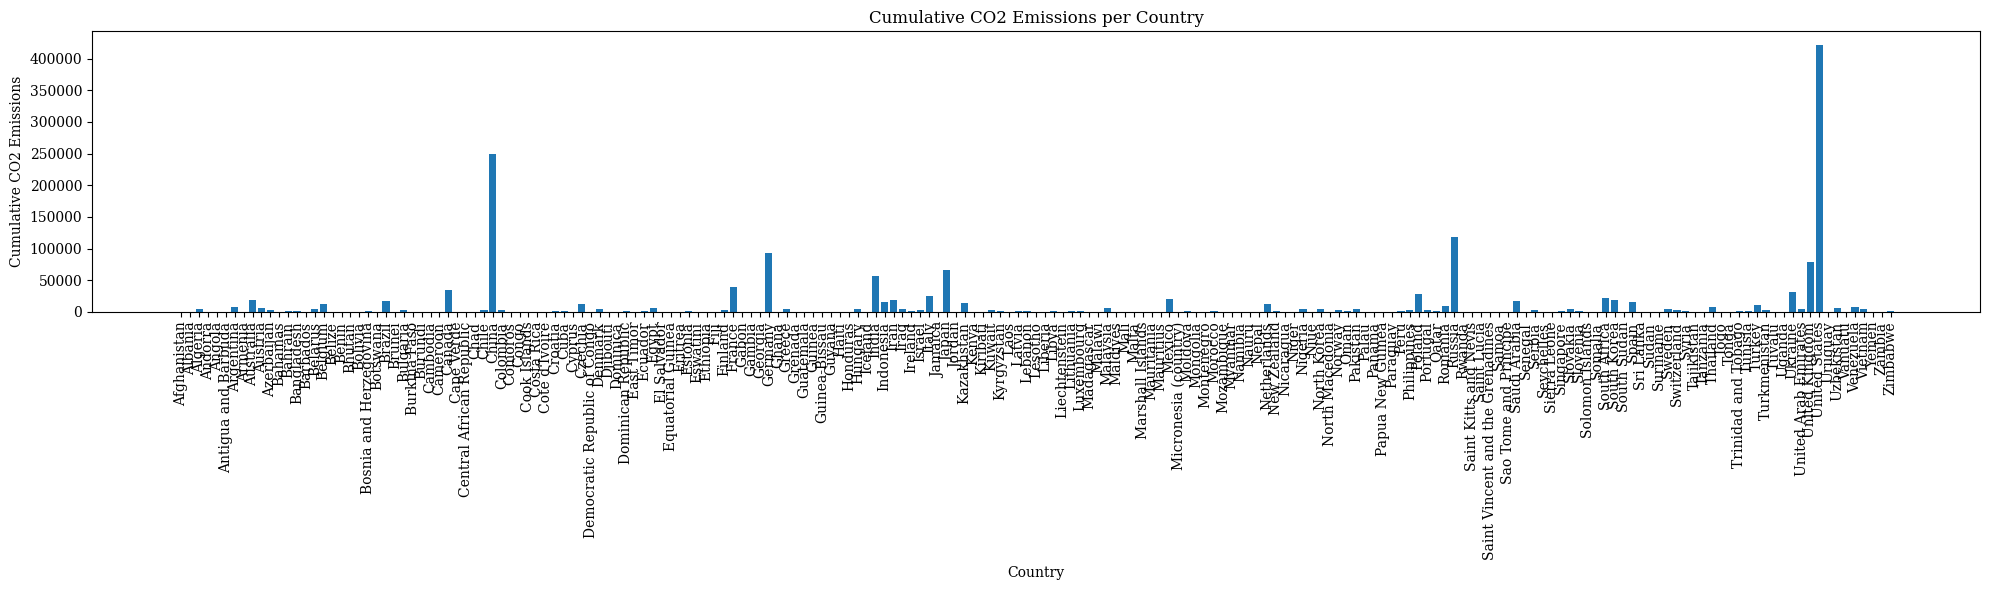

In [34]:
plt.figure(figsize=(20, 6))
plt.bar(df['country'], df['cumulative_co2'])
plt.xlabel('Country')
plt.ylabel('Cumulative CO2 Emissions')
plt.title('Cumulative CO2 Emissions per Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> As it can be seen, the US is the top most country that has generated more Co2 from oil, followed by China. This was surprising in a way as we were expecting China to be the top 1.

#### Line chart  Cummulative CO2 emissions for selected countries

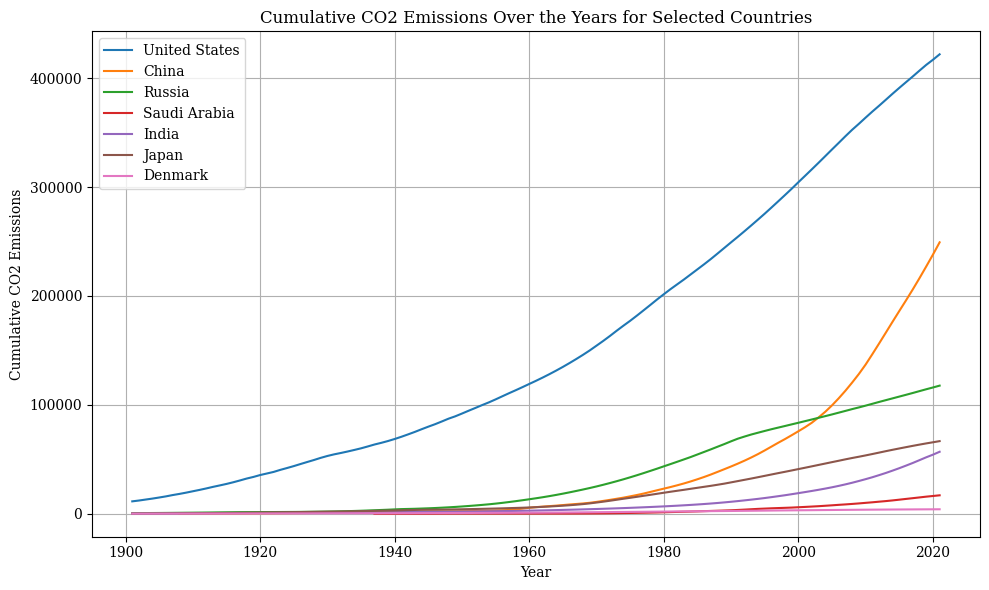

In [35]:
countries_to_plot = ['United States', 'China', 'Russia', 'Saudi Arabia', 'India', 'Japan', 'Denmark']

countries_data = df[df['country'].isin(countries_to_plot)]

plt.figure(figsize=(10, 6))

for country in countries_to_plot:
    country_data = countries_data[countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['cumulative_co2'], label=country)

plt.xlabel('Year')
plt.ylabel('Cumulative CO2 Emissions')
plt.title('Cumulative CO2 Emissions Over the Years for Selected Countries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Below, an interactive version of the plot with all countries can be found. This plot will be used in our webesite to make it more appealing and interesting!

#### Co2 Emissions for selected countries

In [36]:
import plotly.graph_objects as go

fig = go.Figure()

countries_to_plot1 = ['Canada', 'Japan', 'Belgium', 'Russia', 'China', 'Germany', 'United States', 'United Kingdom', 'France']
countries_data = df[(df['country'].isin(countries_to_plot1)) & (df['year'] <= 1950) & (df['year'] >= 1900)]
for country in countries_to_plot1:
    country_data = countries_data[countries_data['country'] == country]
    fig.add_trace(go.Scatter(x=country_data['year'], y=country_data['co2'], mode='lines', name=country))

fig.update_layout(
    title='',
    xaxis_title='Year',
    yaxis_title='CO₂ Emissions',
    legend_title='Country',
    showlegend=True,
    hovermode='x',
    template='plotly',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

import plotly.io as pio

# Save the plot as an HTML file
# pio.write_html(fig, 'plot_co2_1945.html')

> In this plot, we can see actually that US and China are the top CO2 emissions producers, followed by Russia and India. It is not surprising that the largest countries, i.e. those with the largest populations, are those that have produced the most CO2 over the years.

#### Land usage per capita line plot

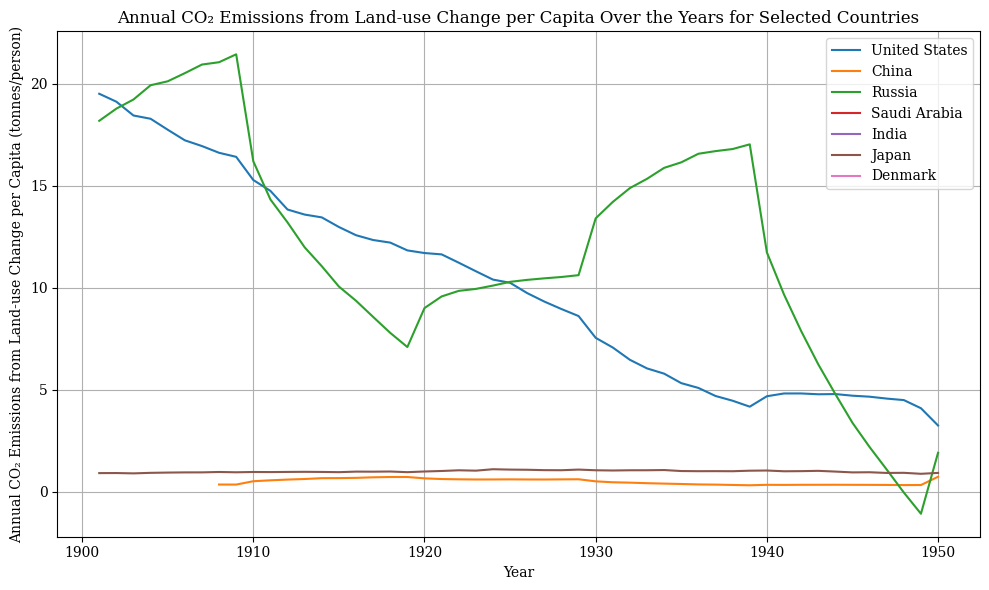

In [37]:
plt.figure(figsize=(10, 6))

for country in countries_to_plot:
    country_data = countries_data[countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['land_use_change_co2_per_capita'], label=country)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions from Land-use Change per Capita (tonnes/person)')
plt.title('Annual CO₂ Emissions from Land-use Change per Capita Over the Years for Selected Countries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

> The reduction in CO2 emissions from land-use change over the years can be attributed to stricter environmental policies, conservation efforts, sustainable agricultural practices, and increased awareness. It is interseting to notice that **Denmark** was producing more CO2 in the years 1920 from land usage than for example China.

> One of the variables we think is interesting to focus on is `share_of_temperature_change_from_ghg` as it measures the Share of contribution to global warming - Measured as a percentage of the world's temperature change.  CO2 emissions are one of the primary drivers of global warming due to the greenhouse effect. When CO2 is released into the atmosphere from various human activities such as burning fossil fuels, deforestation, and industrial processes, it traps heat from the sun, leading to an increase in global temperatures.






> As it can be seen below, for no one surprise, the US is the main contributor when it comes to temperature percentage worldwide. But it is interesting to note that the trend for the US is downward, i.e. since about 1940, the percentage has been decreasing year by year. However, for China, from about 2000 onwards, this percentage increases significantly. This may be related to the governmental policies adopted in the US and the large industry persisting in China today.


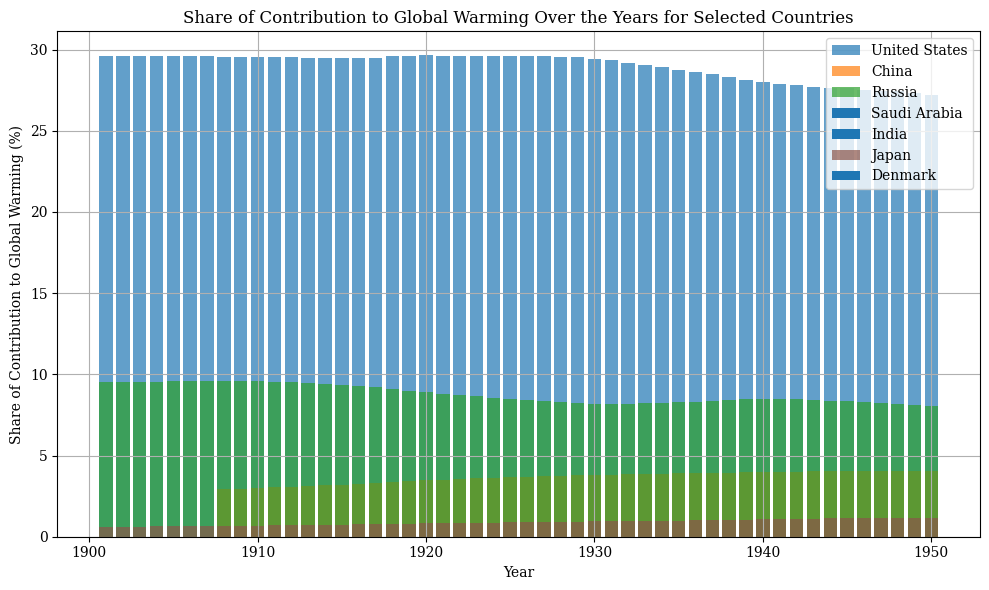

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for country in countries_to_plot:
    country_data = countries_data[countries_data['country'] == country]
    plt.bar(country_data['year'], country_data['share_of_temperature_change_from_ghg'], label=country, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Share of Contribution to Global Warming (%)')
plt.title('Share of Contribution to Global Warming Over the Years for Selected Countries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


> Now we would like to see the variable `share_global_co2` which basically represents the Share of global annual CO₂ emissions - Annual total emissions of carbon dioxide (CO₂), excluding land-use change, measured as a percentage of global emissions of CO₂ in the same year.

> As it can be seen the trend for the two main countries (US and China) is similar to the previous graph. It can be seen that China increases its impact on the environment paramountly from 1980 onwards (with a peak in 1960). However, the US shows a downward trend since about 1945.

#### Share of Global CO2 emissions line plot

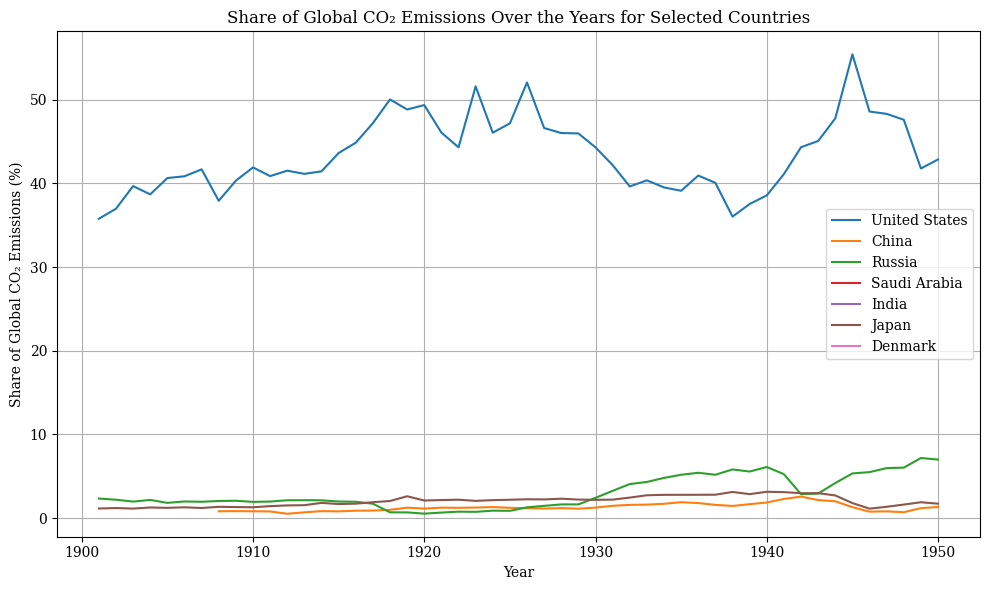

In [39]:
plt.figure(figsize=(10, 6))

for country in countries_to_plot:
    country_data = countries_data[countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['share_global_co2'], label=country)

plt.xlabel('Year')
plt.ylabel('Share of Global CO₂ Emissions (%)')
plt.title('Share of Global CO₂ Emissions Over the Years for Selected Countries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Below you can find another interative plot we think is interesting to have a look.

In [40]:
import plotly.graph_objects as go

fig = go.Figure()

for country in countries_to_plot:
    country_data = countries_data[countries_data['country'] == country]
    fig.add_trace(go.Scatter(x=country_data['year'], y=country_data['share_global_co2'], mode='lines', name=country))

fig.update_layout(
    title='Share of Global CO₂ Emissions Over the Years for Selected Countries',
    xaxis_title='Year',
    yaxis_title='Share of Global CO₂ Emissions (%)',
    legend_title='Country',
    showlegend=True,
    hovermode='x',
    template='plotly',
)

fig.show()


Now, we would like to show you a world heat map per cumulative Co2. For that we will focus on the year 2021 as is the last on available in the dataset and it has all the cumulative CO2 throught the years.

For this, we will need to use the `ISO 3166-1 alpha-3 country codes` which can be found here: https://github.com/takuma7/iso-3166-1-csv/blob/main/iso-3166-1.csv

#### Interactive world maps

##### Data merging

In [89]:
df_iso = pd.read_csv("/content/drive/MyDrive/datasocialdata/iso-3166-1.csv")

In [90]:
df_iso.columns

Index(['English short name', 'French short name', 'Alpha-2 code',
       'Alpha-3 code', 'Numeric'],
      dtype='object')

In [91]:
df_iso.drop(columns=['French short name', 'Alpha-2 code', 'Numeric'], inplace=True)

We have to first extract the name of the country and the value of cumulative co2 in 2021

In [92]:
df_2021 = df[df['year'] == 2021][['country',"co2", 'cumulative_co2', 'temperature_change_from_co2', "co2_per_capita", "land_use_change_co2"]]
df_2021.head(2)

,country,co2,cumulative_co2,temperature_change_from_co2,co2_per_capita,land_use_change_co2
71,Afghanistan,12.283,218.608,0.001,0.306,-0.017
159,Albania,4.904,293.933,0.000,1.718,0.119


Now we merge with the ISO code to then create the world heat map.

In [93]:
merged_df = pd.merge(df_2021, df_iso, how='left', left_on='country', right_on='English short name')

In [94]:
merged_df.head(3)

,country,co2,cumulative_co2,temperature_change_from_co2,co2_per_capita,land_use_change_co2,English short name,Alpha-3 code
0,Afghanistan,12.283,218.608,0.001,0.306,-0.017,Afghanistan,AFG
1,Albania,4.904,293.933,0.000,1.718,0.119,Albania,ALB
2,Algeria,180.225,4900.500,0.002,4.080,1.949,Algeria,DZA


In [95]:
rows_with_nan = merged_df[merged_df.isna().any(axis=1)]

df_with_nan = rows_with_nan.copy()

There are some rows with NaN values that we have to handle before creating the plot.

In [96]:
df_with_nan.head(2)

,country,co2,cumulative_co2,temperature_change_from_co2,co2_per_capita,land_use_change_co2,English short name,Alpha-3 code
11,Bahamas,2.101,171.063,0.000,5.150,-0.037,NaN,NaN
20,Bolivia,21.726,561.027,0.003,1.799,8.900,NaN,NaN


In [97]:
iso_mapping = {
    'Bahamas': 'BHS',
    'Bolivia': 'BOL',
    'Brunei': 'BRN',
    'Cape Verde': 'CPV',
    'Central African Republic': 'CAF',
    'Comoros': 'COM',
    'Congo': 'COG',
    'Cook Islands': 'COK',
    "Cote d'Ivoire": 'CIV',
    'Democratic Republic of Congo': 'COD',
    'Dominican Republic': 'DOM',
    'East Timor': 'TLS',
    'Gambia': 'GMB',
    'Iran': 'IRN',
    'Laos': 'LAO',
    'Marshall Islands': 'MHL',
    'Micronesia (country)': 'FSM',
    'Moldova': 'MDA',
    'Netherlands': 'NLD',
    'Niger': 'NER',
    'North Korea': 'PRK',
    'Philippines': 'PHL',
    'Russia': 'RUS',
    'South Korea': 'KOR',
    'Sudan': 'SDN',
    'Syria': 'SYR',
    'Tanzania': 'TZA',
    'United Arab Emirates': 'ARE',
    'United Kingdom': 'GBR',
    'United States': 'USA',
    'Venezuela': 'VEN',
    'Vietnam': 'VNM'
}

# Update the 'Alpha-3 code' and 'English short name' columns in the DataFrame
for country, iso_code in iso_mapping.items():
    merged_df.loc[merged_df['country'] == country, 'Alpha-3 code'] = iso_code
    merged_df.loc[merged_df['country'] == country, 'English short name'] = country


merged_df.head(2)

,country,co2,cumulative_co2,temperature_change_from_co2,co2_per_capita,land_use_change_co2,English short name,Alpha-3 code
0,Afghanistan,12.283,218.608,0.001,0.306,-0.017,Afghanistan,AFG
1,Albania,4.904,293.933,0.000,1.718,0.119,Albania,ALB


In [98]:
merged_df.isnull().sum()

country                        0
co2                            0
cumulative_co2                 0
temperature_change_from_co2    0
co2_per_capita                 0
land_use_change_co2            0
English short name             0
Alpha-3 code                   0
dtype: int64

> Now our data is ready to create a heatmap

##### CO2 emissions year 20021 by countries

In [99]:

fig = go.Figure(go.Choropleth(
    locations=merged_df['Alpha-3 code'],  # Use ISO 3166-1 alpha-3 country codes
    z=merged_df['co2'],
    text=merged_df['country'],  # Text to display on hover (use 'country' column)
    colorscale='Reds',  # Change colorscale to red tones
    colorbar=dict(title='Cumulative CO2 Emissions (metric tons)', tickprefix='', ticksuffix='', ticks='outside'),  # Customize colorbar
))

fig.update_layout(
    title='CO2 Emissions for the Year 2021 by Country',
    geo=dict(
        showcoastlines=True,  # Show country coastlines
        projection_type='mercator'  # Choose map projection type
    ),
    width=1500,  # Set the width of the plot
    height=1000,  # Set the height of the plot
)

fig.show()


In [100]:
fig = go.Figure(go.Choropleth(
    locations=merged_df['Alpha-3 code'],  # Use ISO 3166-1 alpha-3 country codes
    z=merged_df['temperature_change_from_co2'],  # Temperature change from CO2 emissions for the year 2021
    text=merged_df['country'],
    colorscale='RdBu',
    reversescale=True,
    colorbar=dict(title='Temperature change from CO2 2021 - Measured in °C', tickprefix='', ticksuffix='', ticks='outside'),  # Customize colorbar
))

fig.update_layout(
    title='Temperature Change from CO2 2021 by Country',
    geo=dict(
        showcoastlines=True,  # Show country coastlines
        projection_type='mercator'  # Choose map projection type
    ),
    width=1500,  # Set the width of the plot
    height=1000,  # Set the height of the plot
)

fig.show()


> This last plot and video is cool but we would like to do it better, for that we are going to use Flourish.

In [101]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Visualization</title>
</head>
<body>

<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/17641009"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

</body>
</html>
"""

display(HTML(html_content))


> As stated beofre and shown now, US, HCina and Russi are the top 3 contributors in terms of cumulative CO2.

##### Co2 emissions 2021 measured in millions tons

In [102]:
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Visualization</title>
</head>
<body>

<div class="flourish-embed flourish-chart" data-src="visualisation/17800939"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

</body>
</html>
"""

display(HTML(html_content))

##### CO2 per capita in the arabian peninsula

In [103]:
# Define a color scale ranging from green to yellow for low emissions and then to red for high emissions
colorscale = [
    [0, 'rgb(0, 128, 0)'],   # Dark green for lowest emissions
    [0.2, 'rgb(173, 255, 47)'],  # Light green for low emissions
    [0.4, 'rgb(255, 255, 0)'],  # Yellow for low/medium emissions
    [0.6, 'rgb(255, 140, 0)'],  # Orange for medium emissions
    [0.8, 'rgb(255, 69, 0)'],  # Orange-red for high emissions
    [1, 'rgb(255, 0, 0)']   # Red for highest emissions
]

fig = go.Figure(go.Choropleth(
    locations=merged_df['Alpha-3 code'],
    z=merged_df['co2_per_capita'],
    text=merged_df['country'],
    colorscale='reds',
    colorbar=dict(title='CO2 Emissions per capita (milllion tons)', tickprefix='', ticksuffix='', ticks='outside'),
))

# Update the layout of the map
fig.update_layout(
    title='CO2 per capita in the Arabian Peninsula, 2021',
    geo=dict(
        showcoastlines=True,
        projection_type='mercator',
        center=dict(lon=45, lat=23),  # Longitude and latitude coordinates of Saudi Arabia
        lonaxis_range=[0, 90],  # Set the longitudinal range for zooming out
        lataxis_range=[-10, 40],  # Set the latitudinal range for zooming out
    ),
    width=1000,
    height=700,
)

# Display the map
fig.show()

import plotly.io as pio

# Save the plot as an HTML file
# pio.write_html(fig, 'qatar2021.html')

##### CO2 emissions by source in the arabian peninsula in 2021

In [104]:
arabian_peninsula_df = df[(df['year'] == 2021) & df['country'].isin(['Saudi Arabia', 'Yemen', 'Oman', 'United Arab Emirates', 'Qatar', 'Bahrain', 'Kuwait'])]

selected_columns = ['coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2']
arabian_peninsula_df = arabian_peninsula_df[selected_columns]

total_emissions = arabian_peninsula_df.sum()

fig = go.Figure(go.Pie(labels=total_emissions.index, values=total_emissions.values))

fig.update_layout(title='CO2 emissions by source in the Arabian Peninsula in 2021')

fig.show()

import plotly.io as pio

# Save the plot as an HTML file
#pio.write_html(fig, 'arabia_fuels.html')

##### CO2 emissions per source world in 2021

In [105]:
arabian_peninsula_df = df[df['year'] == 2021]

selected_columns = ['coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2']
arabian_peninsula_df = arabian_peninsula_df[selected_columns]

total_emissions = arabian_peninsula_df.sum()

fig = go.Figure(go.Pie(labels=total_emissions.index, values=total_emissions.values))

fig.update_layout(title='CO2 emissions by source in the Arabian Peninsula in 2021')

fig.show()


# Save the plot as an HTML file
# pio.write_html(fig, 'arabia_fuels.html')
#pio.write_html(fig, 'arabia_fuels.html')

##### CO2 emissions from land usage for the year 2021 world

In [106]:
fig = go.Figure(go.Choropleth(
    locations=merged_df['Alpha-3 code'],  # Use ISO 3166-1 alpha-3 country codes
    z=merged_df['land_use_change_co2'],  # Cumulative CO2 emissions for the year 2021
    text=merged_df['country'],  # Text to display on hover (use 'country' column)
    colorscale='Viridis',  # Change colorscale to red tones
    colorbar=dict(title='CO2 Emissions (million tons)', tickprefix='', ticksuffix='', ticks='outside'),  # Customize colorbar
))

fig.update_layout(
    title='CO2 emissions from land-use change for the Year 2021 by Country',
    geo=dict(
        showcoastlines=True,  # Show country coastlines
        projection_type='mercator'
    ),
    width=1000,
    height=700,
)

fig.show()

import plotly.io as pio

# Save the plot as an HTML file
# pio.write_html(fig, 'landuseco2_global_2021.html')

##### Environment policies per country

In this case we wanted to check if the countries that were polluting more our planet were taking action against this.

For this, we found this dataset: https://climatedata.imf.org/pages/go-indicators
which shows different measures that governments are taking agains polllution. In this case we will focus in the variable: `Total_Expenditure Environmental Protection`.

*Unfortunately, there are some missing countris in the dataset.*

In [107]:
gdf = gpd.read_file('/content/drive/MyDrive/datasocialdata/geo.gpkg')

In [108]:
gdf.columns

Index(['Country', 'ISO2', 'ISO3', 'Indicator', 'Source', 'CTS_Code',
       'CTS_Name', 'CTS_Full_Descriptor', 'Unit', 'F1995', 'F1996', 'F1997',
       'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021',
       'F2022', 'geometry'],
      dtype='object')

In [109]:
columns_to_keep = ['Country', 'ISO3', 'F2000', 'F2001', 'F2002', 'F2003',
                   'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
                   'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017',
                   'F2018', 'F2019', 'F2020', 'F2021', 'F2022']
gdf = gdf[columns_to_keep]


gdf['Total_Expenditure'] = gdf.iloc[:, 2:].sum(axis=1)


data = dict(
    type='choropleth',
    locations=gdf['ISO3'],
    z=gdf['Total_Expenditure'],
    text=gdf['Country'],
    colorscale='viridis',
    colorbar=dict(title='Total Expenditure')
)

layout = dict(
    title='Total Expenditure on Environment Protection by Country',
    geo=dict(
        showcoastlines=True,
        projection_type='mercator'
    ),
    width=1500,
    height=1000
)

fig = go.Figure(data=[data], layout=layout)

fig.show()

##### Political regime

Is there any relation between the political regime of the country, the total expendirute in environmental protection ? We look into it.


Dataset: *https://ourworldindata.org/grapher/political-regime*


**The classification distinguishes between closed autocracies (score 0), electoral autocracies (score 1), electoral democracies (score 2), and liberal democracies (score 3)**



*   In ***closed autocracies***, citizens do not have the right to either choose the chief executive of the government or the legislature through multi-party elections.
*   In ***electoral autocracies***, citizens have the right to choose the chief executive and the legislature through multi-party elections; but they lack some freedoms, such as the freedoms of association or expression, that make the elections meaningful, free, and fair.
*    In ***electoral democracies***, citizens have the right to participate in meaningful, free and fair, and multi-party elections.

*    In ***liberal demoracies***, citizens have further individual and minority rights, are equal before the law, and the actions of the executive are constrained by the legislative and the courts.

In [110]:
political_regime = pd.read_csv('/content/drive/MyDrive/datasocialdata/political-regime.csv')

political_regime['Year'] = pd.to_numeric(political_regime['Year'])

def generate_heatmap(year):
    data_year = political_regime[political_regime['Year'] == year]

    fig = go.Figure(data=go.Choropleth(
        locations=data_year['Code'],
        z=data_year['Political regime'],
        text=data_year['Entity'],
        colorscale='RdBu',
        colorbar_title='Political Regime'
    ))

    fig.update_layout(
        title=f'Political Regime Heatmap {year}',
        geo=dict(
            showcoastlines=True,
            projection_type='mercator'
        ),
        width=680,
        height=700
    )
    pio.write_html(fig, 'politicalRegime.html')
    fig.show()



generate_heatmap(2021)


##### Population for the year 2021

In [111]:
data_filtered = df[df['country'].isin(countries_to_plot)]

# Create the line plot
fig = px.line(data_filtered, x='year', y='population', color='country',
              title='Population of Selected Countries Over Years',
              labels={'population': 'Population', 'year': 'Year', 'country': 'Country'})

# Update layout
fig.update_layout(width=680, height=700)

# Show the plot
fig.show()
# pio.write_html(fig, 'population.html')

##### Change in global temperature surface cause by greenhouse gas emissions

In [114]:
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Visualization</title>
</head>
<body>

<div class="flourish-embed flourish-hierarchy" data-src="visualisation/17792609"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

</body>
</html>
"""

display(HTML(html_content))

##### Line plot tchange in global temeprature through the years

In [113]:
data_filtered = df[df['country'].isin(countries_to_plot)]

# Create the line plot
fig = px.line(data_filtered, x='year', y='temperature_change_from_ghg', color='country',
              title='Temperature change of Selected Countries Over Years',
              labels={'temperature_change_from_ghg': 'temperature_change_from_ghg', 'year': 'Year', 'country': 'Country'})

# Update layout
fig.update_layout(width=680, height=700)

# Show the plot
fig.show()
# pio.write_html(fig, 'population.html')


## 4. Genre
1. Which genre of data story did you use?
> We have chosen the Maganize style genre. As we think it lets us combine text and data to communicate complex information in an accesible and visually appealing way. Making it accesible to a wider audience, not just experts.

2. Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
>

3. Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?
>

## 5. Visualizations
1. Explain the visualizations you've chosen.
> We have chosen principally bar plots to represent for exmaple the amount of CO2 emissions a country contribute to the overall. As well, we thought that as CO2 emissions is a global problem (pollution), a good way to represent which country is taking care of it, or either pollution more, we create differents world maps represeting from CO2 emissions, to political parties or eiether the total expenditure of a country in protecting the environment.
Also, we wanted to represent the CO2 emissions of the countries throught the years, that is why we create the bar chart race plot. It is important to highlight that the majority of the plots are interactive.

2. Why are they right for the story you want to tell?
> World heat maps are perfect for our story on CO2 emissions because they vividly display the global scale of the issue. They allow us to compare emissions across regions, track trends over time, and visualize the impact on different parts of the world. With heat maps, we can effectively communicate the urgent need for collective action to address this worldwide problem.this plot gives us:
-   Global Perspective: CO2 emissions are a truly global problem, with every corner of the world contributing to the issue in some way. World heat maps provide an immediate visual representation of this global scale, showing how emissions are distributed across different regions and countries.
-   Comparative Analysis: Heat maps allow for easy comparison between regions or countries. By using color gradients to represent varying levels of CO2 emissions, viewers can quickly identify which areas are contributing the most to the problem and which ones might be relatively lower emitters.
-   Trend Identification: Over time, world heat maps can show how CO2 emissions have evolved, whether they are increasing, decreasing, or remaining stable in different parts of the world. This temporal dimension adds depth to the story by highlighting trends and patterns that may emerge over years or decades.

## 6. Discussion
Think critically about your creation
1. What went well?
>At the beginning everything started well because, as explained above, we divided the work efficiently. However, we started encountering problems with the website, especially with the template we downloaded. We were getting a lot of errors when displaying the page and we did not understand why. Finally, we were able to solve them. Then new problems appeared, for example, the interactive plots were not displayed correctly, i.e., the plot was cut in half or was not represented correctly, as mentioned above, this happened because of the template we chose.

>At the same time, another problem we encountered was that our images and interactive plots were not displayed, we got a 404 error, the files could not be found. In the end, we resorted to two websites to host our images and interactive plots (HTML).

>In general, the problems that arose made our work difficult, but as a team we were able to solve them in long work sessions.

2. What is still missing? What could be improved?, Why?
>What has not been implemented in this website or explainer notebook are machine learning algorithms to try to predict CO2 emissions. The reason for not having carried out this analysis lies in the lack of data, initially, the dataset had a large amount (more than half of the variables) that had null values, approximately more than 55%. To carry out a study of that nature, higher quality data would have been needed.

>As future work, it is proposed to improve the dataset and use ML algorithms.

## 7. Contributions
1. Who did what?
- Fernando: explainer jupter notebook & clips for the video (project assignment A) & Extra data for the visualizations
- Gabriele: web page (design, UI/UX...) & edition of the video (project assignment A) & CO2 data
2. You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

> As we were 2 people in the group, we consider we have contributed equally to the project as, for exmaple, Gabriele is an expert in web design and aesthetic while Fernando performs better in coding & data mining.
In our particular case: Gabriele took the role of web designer (taking into considerations always the UX/UI as well as usability), not only he took the role of web designer but aso he took the role of director of the video (creating the script, editing the video and everything related with this).
Fernando took the role of programmer, he was in charge of the data minig & coding all the plots and visualizations needed for the web page. As well, he merge data to our original data to create better visualizations as for exmaple the bar chart race plot.

So, as said before, we have contribute equally to this project 50%. Each of us bringing to the table our best skills.

## 8. References

Over Space
<ul>
  <li><a href="https://joint-research-centre.ec.europa.eu/jrc-news-and-updates/global-co2-emissions-rebound-2021-after-temporary-reduction-during-covid19-lockdown-2022-10-14_en#:~:text=In%202021%2C%20global%20anthropogenic%20fossil,the%20world's%20largest%20CO2%20emitters.">https://joint-research-centre.ec.europa.eu</a></li>
  <li><a href="https://ec.europa.eu/eurostat/web/products-eurostat-news/w/DDN-20221221-1">https://ec.europa.eu</a></li>
  <li><a href="https://www.wwf.org.br/?84261/Deforestation-in-the-Amazon-remains-at-high-levels-with-a-rate-of-11568-km2-in-2022#:~:text=Deforestation%20in%20the%20Amazon%20remained,years%2C%20during%20the%20Bolsonaro%20government.">https://www.wwf.org.br</a></li>
  <li><a href="https://www.nicfi.no/2023/06/27/deforestation-still-at-a-record-low-in-indonesia/#:~:text=Figures%20on%20deforestation%20in%20Indonesia,%2D2021%3A%20113%2C500%20hectares.">https://www.nicfi.no</a></li>
</ul>


Over time
<ul>
  <li><a href="https://climate.nasa.gov/vital-signs/carbon-dioxide/?intent=121">https://climate.nasa.gov/vital-signs/carbon-dioxide/?intent=121</a></li>
  <li><a href="https://www.history.com/topics/1960s/1960s-history">https://www.history.com/topics/1960s/1960s-history</a></li>
  <li><a href="https://www.history.com/topics/1980s">https://www.history.com/topics/1980s</a></li>
</ul>

Global warming
<ul>
  <li><a href="https://data.giss.nasa.gov/gistemp/">https://data.giss.nasa.gov/gistemp/</a></li>
  <li><a href="https://earthobservatory.nasa.gov/world-of-change/global-temperatures">https://earthobservatory.nasa.gov/world-of-change/global-temperatures</a></li>
  <li><a href="https://www.britannica.com/event/Kyoto-Protocol">https://www.britannica.com/event/Kyoto-Protocol</a></li>
  <li><a href="https://www.imo.org/es/MediaCentre/PressBriefings/pages/MEPC76.aspx">https://www.imo.org/es/MediaCentre/PressBriefings/pages/MEPC76.aspx</a></li>
</ul>


Other factors
<ul>
  <li>Bakaki, Z., Böhmelt, T., &amp; Ward, H. (2022). “Carbon Emission Performance and Regime Type: The Role of Inequality.” Global Environmental Politics, 22(2), 156–179.</li>
  <li><a href="https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Government_expenditure_on_environmental_protection">https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Government_expenditure_on_environmental_protection</a></li>
  <li><a href="https://scholar.google.com/scholar_url?url=https://direct.mit.edu/glep/article-abstract/22/2/156/109239&amp;hl=es&amp;sa=T&amp;oi=gsb&amp;ct=res&amp;cd=0&amp;d=15064819800663894442&amp;ei=hFYzZrPLOuDIy9YPo4qroAI&amp;scisig=AFWwaeZVxV7efzba9rzG32m5EGle">https://shorturl.at/jrwEK</a></li>
</ul>